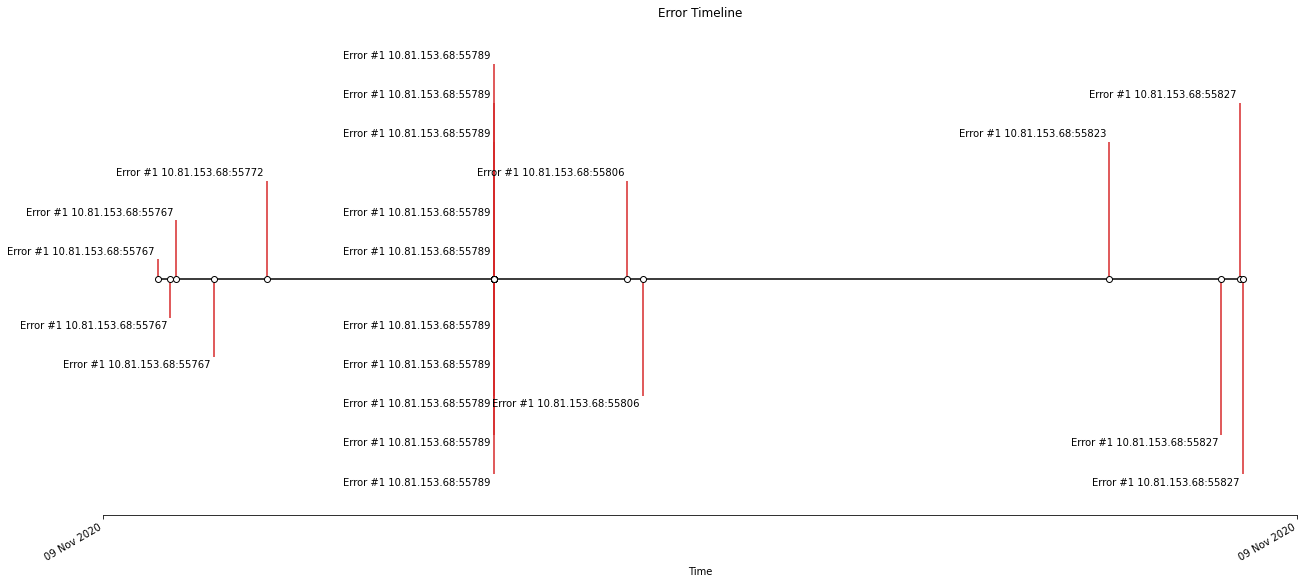

In [17]:
import pandas as pd
import pylab
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
data = pd.read_csv('errorparsed.csv', index_col=False)

if data.empty == True:
        exit()
        
client = data.Client
error = data.Error
date = data.Time
dates = [datetime.strptime(d, "%a %b %d %H:%M:%S %Y") for d in date]
dates
# Choose some nice levels
levels = np.tile([1,-2,3,-4,5,-6,7,-8,9,-10,11],
         int(np.ceil(len(dates)/11)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(18, 8), constrained_layout=True)
ax.set(title= "Error Timeline")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r,r2, va in zip(dates, levels, client, error ,vert):
    ax.annotate(r2+r, xy=(d, l), xytext=(-3, np.sign(l)*3),
    textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%d %b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.xlabel('Time')
plt.savefig('error.png')
plt.show()